In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pred_dim_effect.csv')
df

,pred_decoder_dim,train_acc,test_acc
0,256,57.556,56.15
1,512,69.038,66.22
2,1024,77.358,70.01
3,2048,80.196,66.96
4,4096,72.500,59.72
5,8192,66.988,56.90


In [3]:
params = {
   'font.size': 24,
   'axes.linewidth': 1.25,
   'axes.labelsize': 24,
   'legend.fontsize': 24,
   'xtick.labelsize': 24,
   'ytick.labelsize': 24
}
plt.rcParams.update(params)

In [4]:
title = 'Effect of $d^{lr}$ on the accuracy'
x_label = '$d^{lr}$'
y_label = 'Accuracy (%)'
legend_labels = ['Train accuracy', 'Test accuracy']

In [5]:
from palettable.colorbrewer.qualitative import Set2_3
colors = Set2_3.mpl_colors

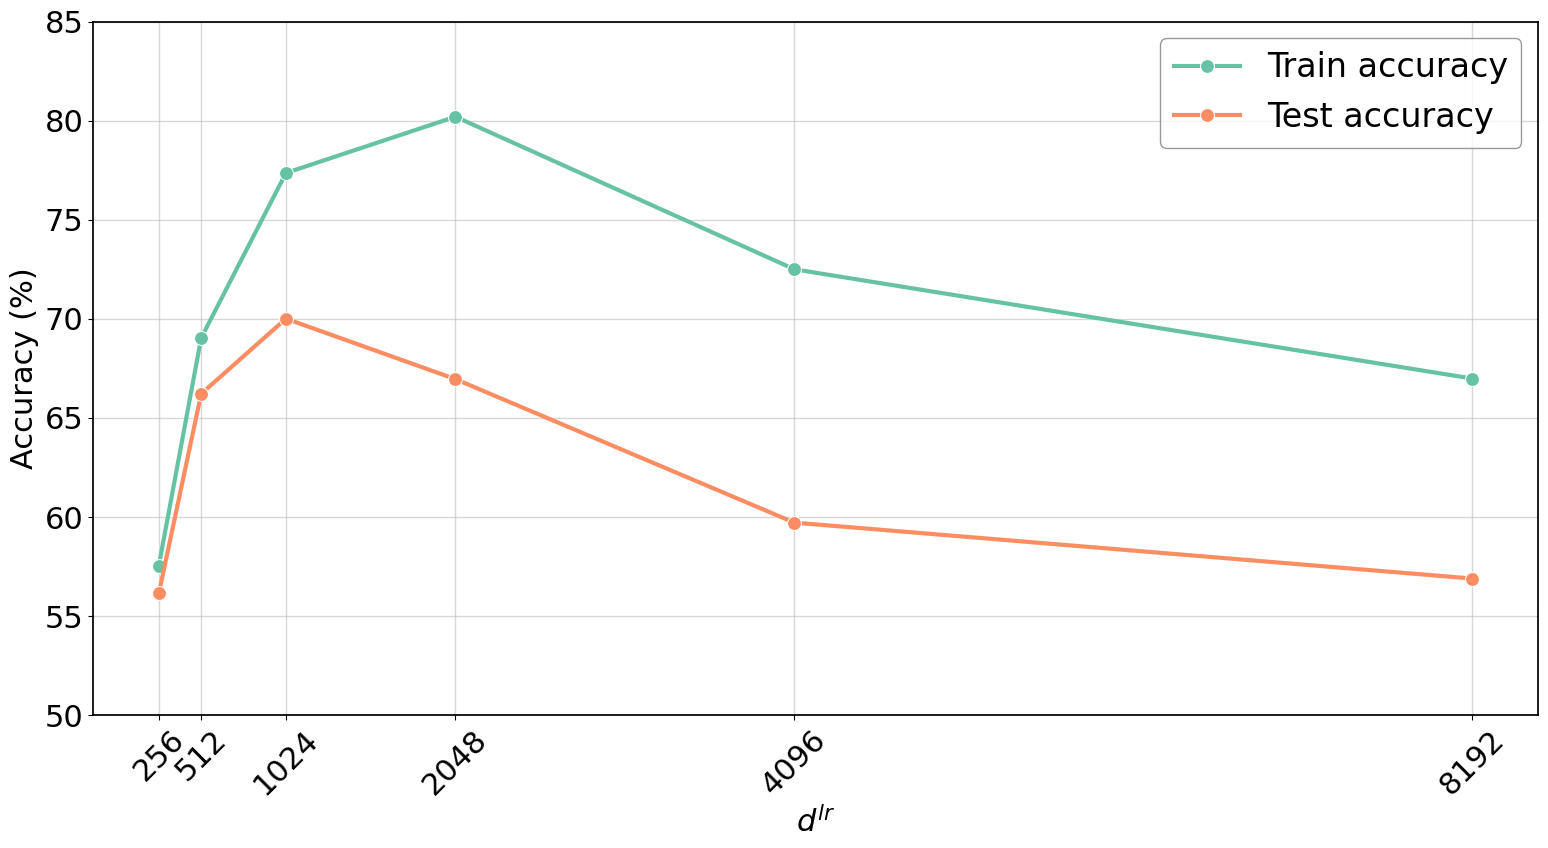

In [6]:
_, ax = plt.subplots(figsize=(16, 9))
kwargs = dict(ax=ax, marker='o', linestyle='-', errorbar=None, linewidth=3, markersize=10)
sns.lineplot(data=df, x='pred_decoder_dim', y='train_acc', **kwargs, color=colors[0])
sns.lineplot(data=df, x='pred_decoder_dim', y='test_acc', **kwargs, color=colors[1])
 
ax.set_xticks(df['pred_decoder_dim'].unique())
ax.xaxis.set_tick_params(labelsize=22, rotation=45)
ax.set_xlabel(x_label, fontsize=22)

ax.set_yticks(range(0, 101, 5), labels=range(0, 101, 5), fontsize=22)
ax.set_ylim(50, 85)
ax.set_ylabel(y_label, fontsize=22)

# ax.set_title(title, fontsize=25)
legend = plt.legend(legend_labels)
frame = legend.get_frame()
frame.set_edgecolor('0.5')
plt.grid(linewidth=1, alpha=0.5, axis='both')
plt.tight_layout()
plt.savefig('dim_lr_effect.pdf')